# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Upgrad/porter_data_1.csv'

Mounted at /content/drive


In [101]:
# Import essential libraries for data manipulation and analysis
# CODE CELL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings, pathlib
import datetime as dt
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_style("whitegrid")


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [102]:
# Importing the file porter_data_1.csv
df = pd.read_csv(file_path)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [103]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df["created_at"] = pd.to_datetime(df["created_at"])
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [104]:
# Convert categorical features to category type
int_cols = ["market_id", "order_protocol"]
df[int_cols] = df[int_cols].astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  int64         
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  int64         
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [105]:
# Calculate time taken in minutes
df["delivery_time_mins"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds() / 60
print(df[["created_at","actual_delivery_time","delivery_time_mins"]].head())

           created_at actual_delivery_time  delivery_time_mins
0 2015-02-06 22:24:17  2015-02-06 23:11:17                47.0
1 2015-02-10 21:49:25  2015-02-10 22:33:25                44.0
2 2015-02-16 00:11:35  2015-02-16 01:06:35                55.0
3 2015-02-12 03:36:46  2015-02-12 04:35:46                59.0
4 2015-01-27 02:12:36  2015-01-27 02:58:36                46.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [106]:
# Extract the hour and day of week from the 'created_at' timestamp
df["order_hour"] = df["created_at"].dt.hour
df["order_dayofweek"] = df["created_at"].dt.dayofweek

# Create a categorical feature 'isWeekend'
df["is_weekend"] = (df["order_dayofweek"] >= 5).astype(bool)


In [22]:
# Drop unnecessary columns
df = df.drop(columns=["created_at", "actual_delivery_time"])

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [107]:
# Define target variable (y) and features (X)
y = df["delivery_time_mins"]
X = df.drop(columns=["delivery_time_mins"])


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [108]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [109]:
# Define numerical and categorical columns for easy EDA and data manipulation
num_cols = [
    "total_items",
    "subtotal",
    "num_distinct_items",
    "min_item_price",
    "max_item_price",
    "total_onshift_dashers",
    "total_busy_dashers",
    "total_outstanding_orders",
    "distance"
]
cat_cols = [
    "market_id",
    "store_primary_category",
    "order_protocol",
    "order_hour",
    "order_dayofweek",
    "is_weekend"
]

print("Numerical cols:", num_cols)
print("Categorical cols:", cat_cols)
df.info()


Numerical cols: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical cols: ['market_id', 'store_primary_category', 'order_protocol', 'order_hour', 'order_dayofweek', 'is_weekend']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  int64         
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  int64         
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_d

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [110]:
# Plot distributions for all numerical columns
rows = (len(num_cols) + 2) // 3
fig, axes = plt.subplots(rows, 3, figsize=(15, 4*rows))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.histplot(X_train[col], kde=True, ax=ax)
    ax.set_title(col)
for ax in axes[len(num_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

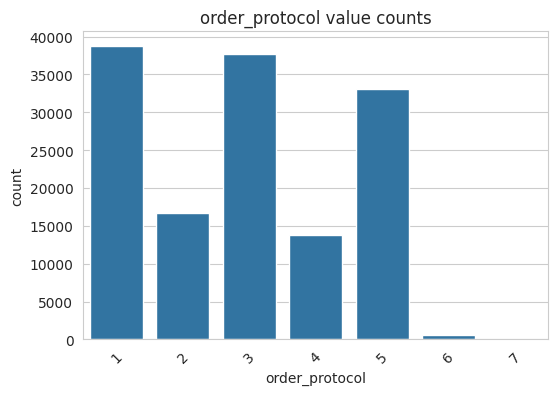

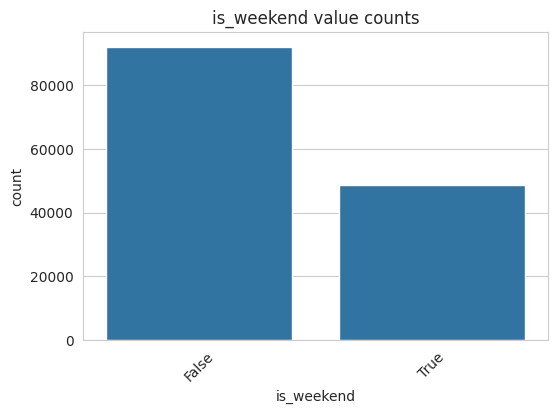

In [111]:
# Distribution of categorical columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=X_train[col])
    plt.title(f"{col} value counts")
    plt.xticks(rotation=45)
    plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

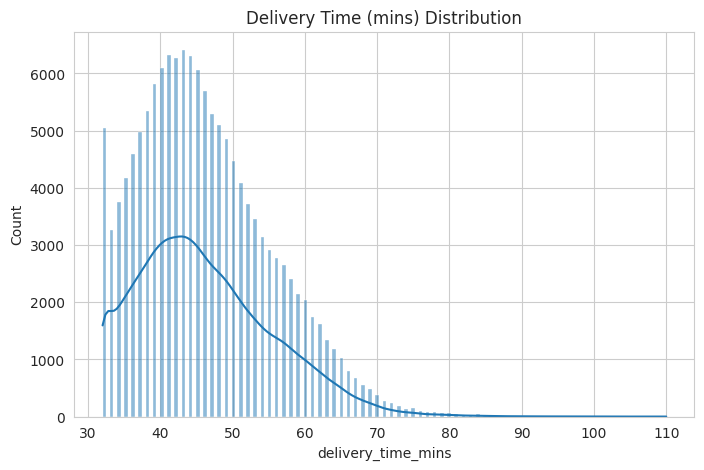

Skewness of y (target): 0.758405238825939


In [112]:
# Distribution of time_taken
plt.figure(figsize=(8,5))
sns.histplot(y_train, kde=True)
plt.title("Delivery Time (mins) Distribution")
plt.xlabel("delivery_time_mins")
plt.show()

print("Skewness of y (target):", y_train.skew())


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

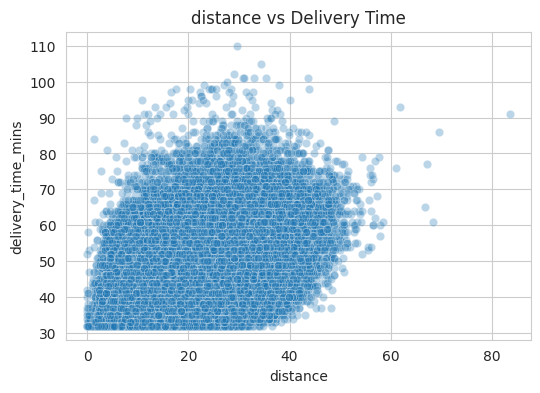

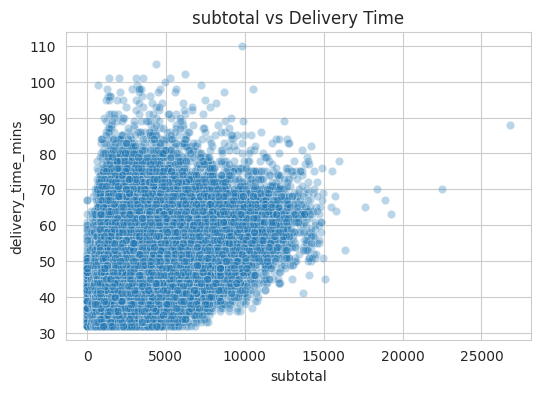

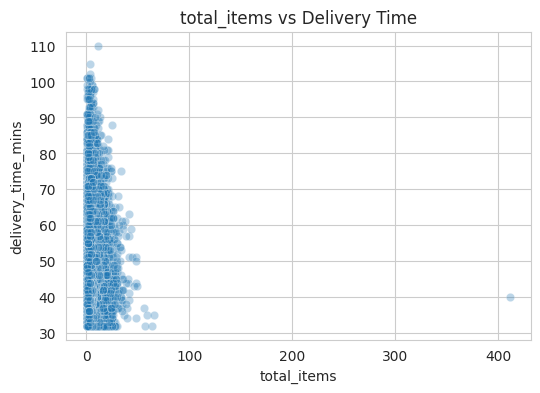

In [113]:
# Scatter plot to visualise the relationship between time_taken and other features
for col in ["distance", "subtotal", "total_items", "total_onshift_dashers"]:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.3)
    plt.title(f"{col} vs Delivery Time")
    plt.xlabel(col)
    plt.ylabel("delivery_time_mins")
    plt.show()


In [114]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12,5))
sns.boxplot(x=X_train["order_hour"], y=y_train)
plt.title("Delivery Time by Order Hour")
plt.xlabel("order_hour")
plt.ylabel("delivery_time_mins")
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [115]:
# Plot the heatmap of the correlation matrix
corr_df = pd.concat([X_train[num_cols], y_train], axis=1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [116]:
# Drop 3-5 weakly correlated columns from training dataset
cols_to_drop = [
    "min_item_price",
    "total_onshift_dashers",
    "total_busy_dashers",
    "total_items"
]


X_train = X_train.drop(columns=cols_to_drop)
X_test  = X_test.drop(columns=cols_to_drop)

num_cols = [c for c in num_cols if c not in cols_to_drop]

print("Dropped features:", cols_to_drop)
print("Remaining features:", X_train.columns.tolist())



Dropped features: ['min_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_items']
Remaining features: ['market_id', 'created_at', 'actual_delivery_time', 'store_primary_category', 'order_protocol', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'distance', 'order_hour', 'order_dayofweek', 'is_weekend']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

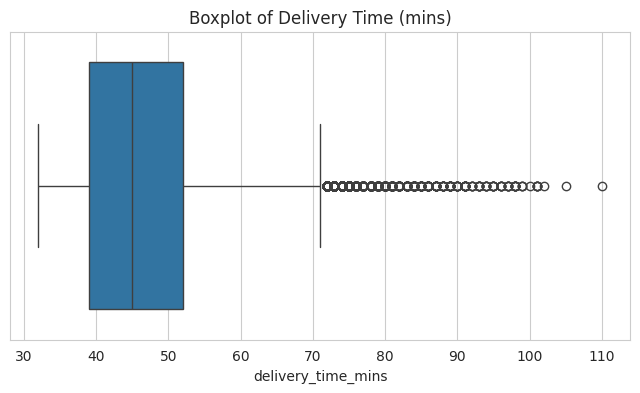

In [117]:
# Boxplot for time_taken
plt.figure(figsize=(8,4))
sns.boxplot(x=y_train)
plt.title("Boxplot of Delivery Time (mins)")
plt.xlabel("delivery_time_mins")
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [118]:
# Handle outliers
q1, q3 = y_train.quantile([0.25, 0.75])
iqr    = q3 - q1
lower  = q1 - 1.5 * iqr
upper  = q3 + 1.5 * iqr

print(f"Lower bound: {lower:.1f} mins,  Upper bound: {upper:.1f} mins")

mask = y_train.between(lower, upper)

X_train, y_train = X_train[mask], y_train[mask]

Lower bound: 19.5 mins,  Upper bound: 71.5 mins


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [119]:
# Define numerical and categorical columns for easy EDA and data manipulation
print(num_cols, cat_cols)
num_cols = [
    "subtotal",
    "num_distinct_items",
    "max_item_price",
    "total_outstanding_orders",
    "distance"
]
cat_cols = [
    "market_id",
    "store_primary_category",
    "order_protocol",
    "order_hour",
    "order_dayofweek",
    "is_weekend"
]


['subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'distance'] ['market_id', 'store_primary_category', 'order_protocol', 'order_hour', 'order_dayofweek', 'is_weekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

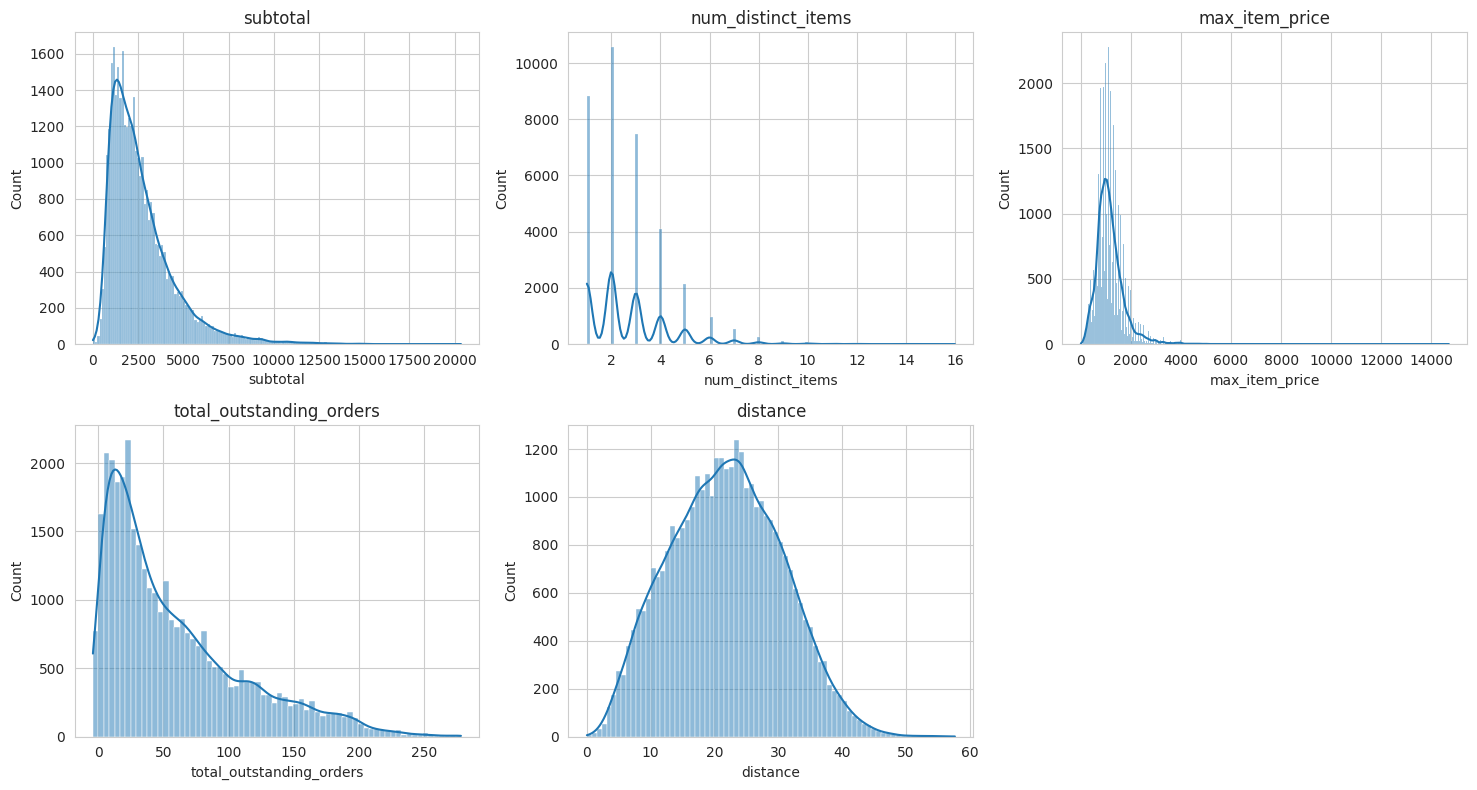

In [120]:
# Plot distributions for all numerical columns
rows = (len(num_cols) + 2)//3
fig, axes = plt.subplots(rows, 3, figsize=(15, 4*rows))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.histplot(X_test[col], kde=True, ax=ax)
    ax.set_title(col)
for ax in axes[len(num_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


##### **4.1.2**
Check the distribution of categorical features

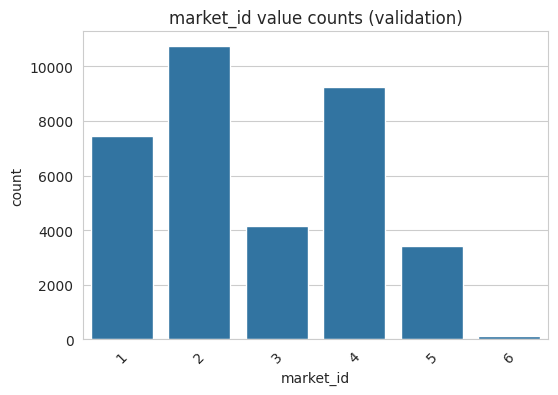

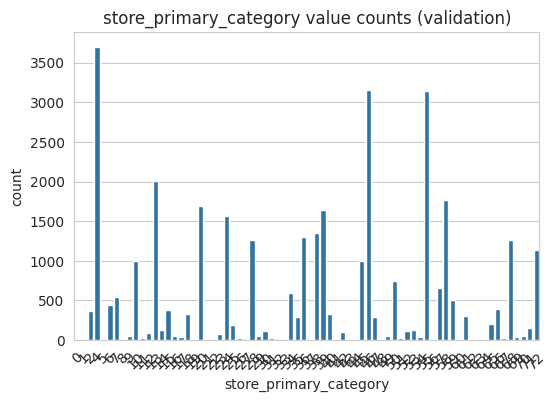

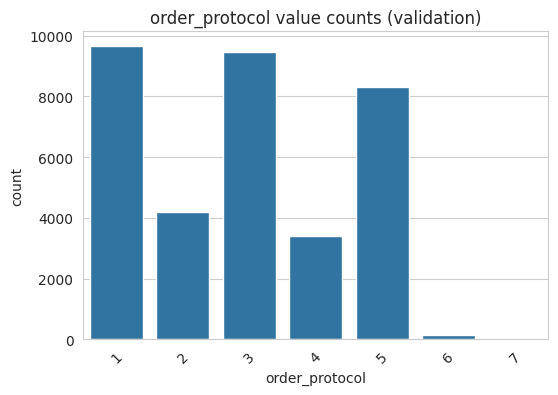

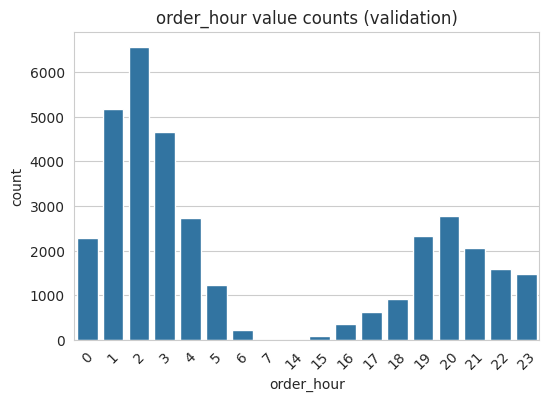

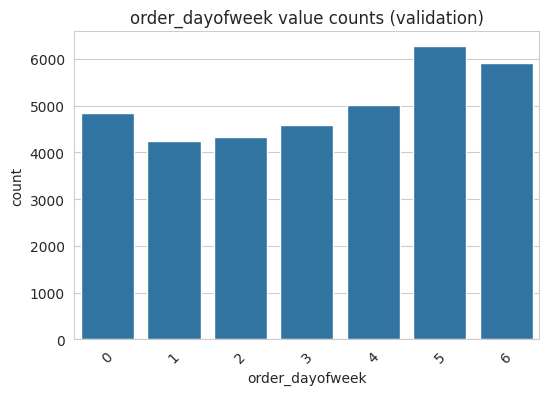

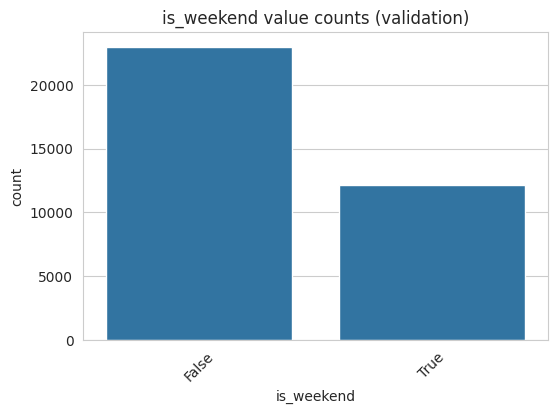

In [121]:
# Distribution of categorical columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=X_test[col])
    plt.title(f"{col} value counts (validation)")
    plt.xticks(rotation=45)
    plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

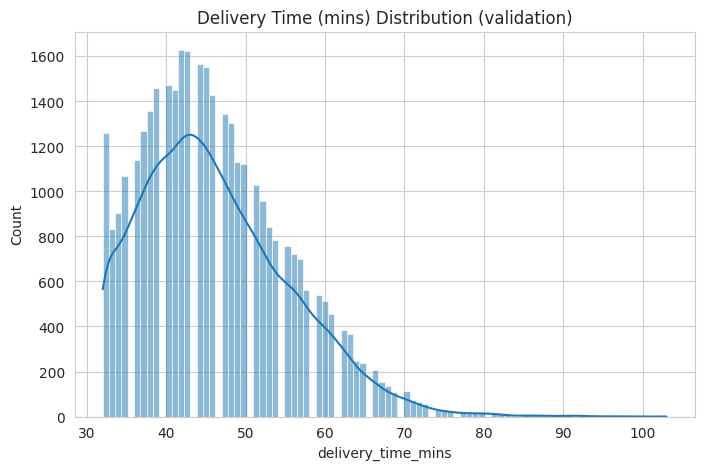

Validation target skewness: 0.78


In [122]:
# Distribution of time_taken
plt.figure(figsize=(8,5))
sns.histplot(y_test, kde=True)
plt.title("Delivery Time (mins) Distribution (validation)")
plt.xlabel("delivery_time_mins")
plt.show()

print("Validation target skewness:", y_test.skew().round(2))


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

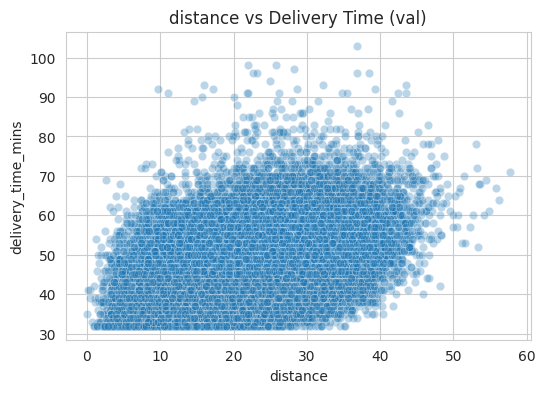

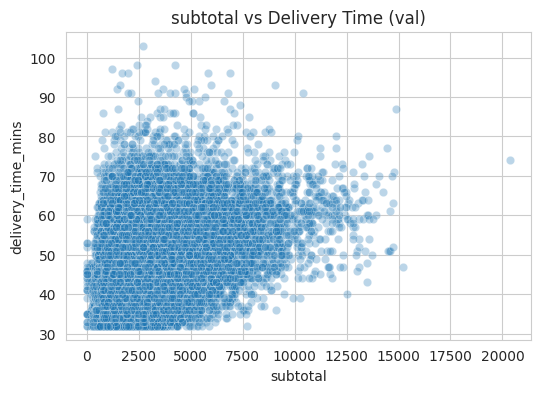

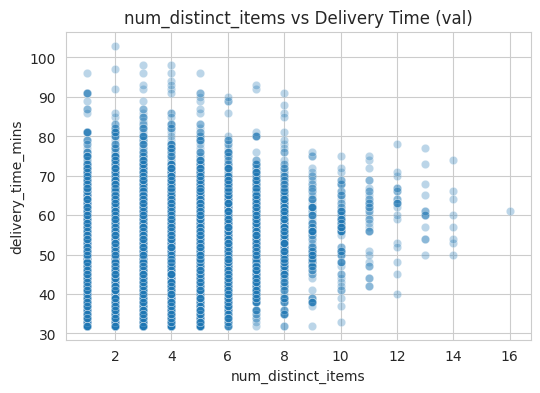

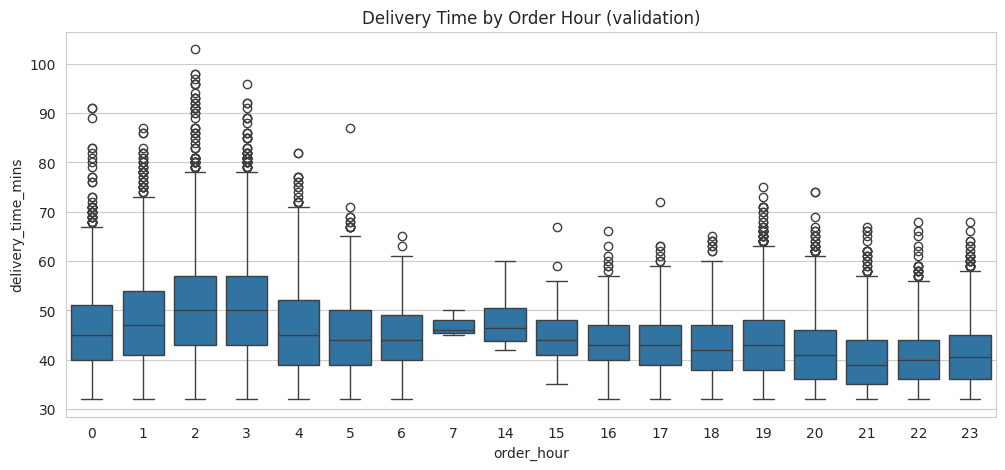

In [123]:
# Scatter plot to visualise the relationship between time_taken and other features
for col in ["distance","subtotal","num_distinct_items"]:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X_test[col], y=y_test, alpha=0.3)
    plt.title(f"{col} vs Delivery Time (val)")
    plt.show()

# Boxplot of delivery time by hour
plt.figure(figsize=(12,5))
sns.boxplot(x=X_test["order_hour"], y=y_test)
plt.title("Delivery Time by Order Hour (validation)")
plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

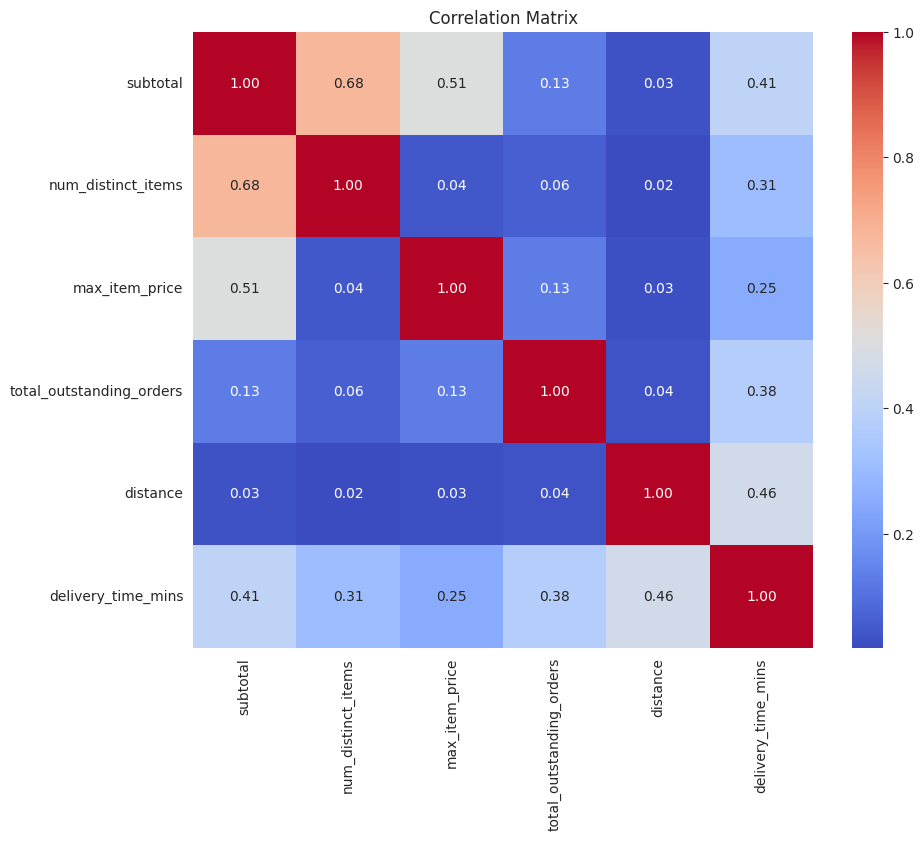

In [124]:
# Drop the weakly correlated columns from training dataset
corr_df = pd.concat([X_train[num_cols], y_train], axis=1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Nothing to drop again!



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [125]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE

from statsmodels.graphics.gofplots import qqplot

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [126]:
# Apply scaling to the numerical columns
scaler = StandardScaler()
X_train_num = pd.DataFrame(
    scaler.fit_transform(X_train[num_cols]),
    columns=num_cols,
    index=X_train.index
)
X_test_num = pd.DataFrame(
    scaler.transform(X_test[num_cols]),
    columns=num_cols,
    index=X_test.index
)

X_train_scaled = pd.concat([X_train_num, X_train[cat_cols]], axis=1)
X_test_scaled  = pd.concat([X_test_num,  X_test[cat_cols]],  axis=1)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (139242, 11)
X_test_scaled shape: (35156, 11)


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [127]:
# Create/Initialise the model
model = LinearRegression()


In [128]:
# Train the model using the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [129]:
# Make predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test  = model.predict(X_test_scaled)

In [130]:
# Find results for evaluation metrics
def print_metrics(y_true, y_pred, stage):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    print(f"{stage} MAE: {mae:.5f}, RMSE: {rmse:.5f}, R²: {r2:.5f}")

print_metrics(y_train, y_pred_train, "Training")
print_metrics(y_test, y_pred_test, "Validation")


Training MAE: 4.69767, RMSE: 5.90858, R²: 0.55024
Validation MAE: 4.87024, RMSE: 6.30147, R²: 0.54633


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [131]:
# Loop through the number of features and test the model
rfe = RFE(estimator=LinearRegression(), n_features_to_select=8)
rfe.fit(X_train_scaled, y_train)

# Listing selected
feat_ranks = pd.Series(rfe.ranking_, index=X_train_scaled.columns)
selected = X_train_scaled.columns[rfe.support_].tolist()

print("Feature ranking (1 = selected):\n", feat_ranks.sort_values().head(12), "\n")
print("Selected 8 features:", selected)


Feature ranking (1 = selected):
 subtotal                    1
num_distinct_items          1
total_outstanding_orders    1
distance                    1
order_protocol              1
market_id                   1
is_weekend                  1
order_dayofweek             1
max_item_price              2
order_hour                  3
store_primary_category      4
dtype: int64 

Selected 8 features: ['subtotal', 'num_distinct_items', 'total_outstanding_orders', 'distance', 'market_id', 'order_protocol', 'order_dayofweek', 'is_weekend']


In [132]:
# Build the final model with selected number of features
X_train_sel = X_train_scaled[selected]
X_test_sel  = X_test_scaled[selected]

# Training new LinearRegression
final_model = LinearRegression().fit(X_train_sel, y_train)

# Predict
y_pred_train_sel = final_model.predict(X_train_sel)
y_pred_test_sel  = final_model.predict(X_test_sel)

# Print metrics
def print_metrics(y_true, y_pred, label):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    print(f"{label} MAE: {mae:.5f}, RMSE: {rmse:.5f}, R²: {r2:.5f}")

print_metrics(y_train, y_pred_train_sel, "Training (8-features)")
print_metrics(y_test,  y_pred_test_sel,  "Validation (8-features)")



Training (8-features) MAE: 4.86130, RMSE: 6.07820, R²: 0.52404
Validation (8-features) MAE: 5.03603, RMSE: 6.47805, R²: 0.52055


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

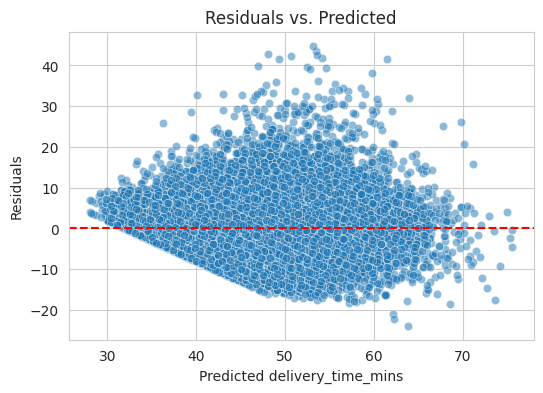

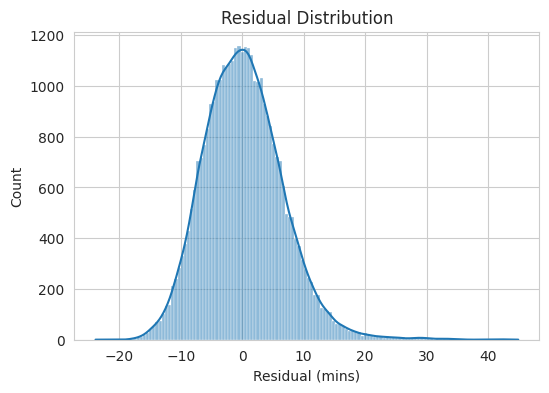

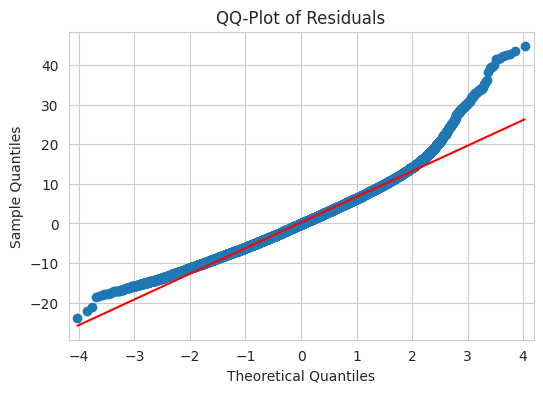

In [133]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
residuals = y_test - y_pred_test_sel

# Residuals vs. Predicted
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_test_sel, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted delivery_time_mins")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted")
plt.show()

# Residual distribution (histogram + KDE)
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residual (mins)")
plt.show()

# Q-plot of residuals
plt.figure(figsize=(6,4))
qqplot(residuals, line='s', ax=plt.gca())
plt.title("QQ-Plot of Residuals")
plt.show()


[Your inferences here:]

- **No strong bias around zero**  
  The Residuals vs Predicted plot is centered roughly on the horizontal zero‐line, indicating our 8-feature model does not systematically over- or under-predict delivery times.

- **Slight heteroscedasticity**  
  The cloud of points fans out as predicted times increase (spread grows from ±10 mins at ~35 mins to ±20–40 mins at ~60 mins), suggesting that prediction errors become larger for longer deliveries.

- **Approximately normal residuals with a right-skewed tail**  
  The histogram of residuals is bell-shaped and peaks near zero, but has a longer right tail (a few under-predictions up to +40 mins) than left, indicating occasional large under-estimates.

- **Heavy tails in the QQ-plot**  
  Most points lie on the straight line in the middle, confirming near-normality, but the upper and lower quantiles deviate (especially on the right), again pointing to a handful of extreme errors.

Overall, residuals are largely centered and roughly normal—good for OLS assumptions—but the increase in variance at higher predicted values and the extreme positive outliers suggest we may want to explore either a variance-stabilising transform or a more robust regression to tighten predictions on long-duration trips.  
```






#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [134]:
# Compare the scaled vs unscaled features used in the final model
scaled_coefs = pd.Series(final_model.coef_, index=X_train_sel.columns)

unscaled_coefs = scaled_coefs.copy()
# considering nummeric values only
for feat in ["subtotal","num_distinct_items","total_outstanding_orders","distance"]:
    scale = scaler.scale_[num_cols.index(feat)]
    unscaled_coefs[feat] = scaled_coefs[feat] / scale

# shwing both side by side
coef_df = pd.DataFrame({
    "scaled_coef": scaled_coefs,
    "unscaled_coef":  unscaled_coefs
})
print(coef_df)


                          scaled_coef  unscaled_coef
subtotal                     2.503587       0.001387
num_distinct_items           0.698887       0.434355
total_outstanding_orders     2.983502       0.057174
distance                     3.901465       0.447849
market_id                   -0.644630      -0.644630
order_protocol              -0.994797      -0.994797
order_dayofweek             -0.578587      -0.578587
is_weekend                   3.741936       3.741936


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [135]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# considering 'num_distinct_items' instead of 'total_items' since it was dropped
feat = "num_distinct_items"

# total_items scaled and unscaled coefficients
scaled_coef = scaled_coefs[feat]
unscaled_coef = scaled_coef / scaler.scale_[num_cols.index(feat)]

print(f"Scaled coefficient for {feat}: {scaled_coef:.3f} (per 1Alpha change)")
print(f"Unscaled coefficient for {feat}: {unscaled_coef:.2f} (per 1-unit change)")

# printing interpretation
print(f"\nInterpretation: Increasing {feat} by one unit, increases the predicted delivery time by approximately {unscaled_coef:.2f} minutes on average.")


Scaled coefficient for num_distinct_items: 0.699 (per 1Alpha change)
Unscaled coefficient for num_distinct_items: 0.43 (per 1-unit change)

Interpretation: Increasing num_distinct_items by one unit, increases the predicted delivery time by approximately 0.43 minutes on average.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>
**Categorical variables:**

market_id (geographic zone),

store_primary_category (e.g. fast-food vs dine-in),

order_protocol (Porter-app vs call-in),

order_hour (0–23),

order_dayofweek (0=Mon…6=Sun),

is_weekend (True/False).

**Inferred effects:**

Weekend deliveries (is_weekend=True) take on average 3.7 minutes longer (unscaled coefficient), so operations are slightly slower on weekends.

Time-of-day (order_hour) shows moderate variation—peak lunch/dinner slots have higher median delivery times.

Order protocol has a small negative effect (approx −0.99 min) suggesting app orders are processed slightly faster than call-in orders.

Market ID coefficients (approx −0.64 min) varied by zone but with very low correlation (< 0.03), indicating geography has only a minor effect after accounting for distance.

Store category did not survive feature-selection, implying its impact was marginal once other factors (distance, load, etc.) were modelled.





---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>
It means 20% of the dataset is held out as the validation (test) set and 80% is used for training. This split ensures we evaluate model performance on unseen data.





---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>
distance with a correlation of 0.46 is the strongest single predictor of delivery time, followed by subtotal (0.41) and total_outstanding_orders (0.39).



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>
Detection: I plotted a boxplot of delivery_time_mins and observed points beyond the whiskers.

Handling: I applied the IQR method on delivery_time_mins—computed Q1/Q3, then removed any rows outside Q1−(1.5xIQR) & Q3+(1.5xIQR) from the training set. This eliminated extreme delivery times while preserving around 98% of the data.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>
By absolute unscaled coefficient magnitude (minutes per 1-unit change):

is_weekend (+3.74 min)

distance (+0.45 min per km)

num_distinct_items (+0.43 min per additional item)

—these three had the largest practical impact on predicted delivery time. (Showing only 'distance' in the cell above. Calculated for all)



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>
Linear regression fits a linear function to minimize the Sum of Squared Errors (SSE).
Under the Ordinary Least Squares (OLS) solution, closed-form estimates are made.

**Key assumptions include:**

*Linearity*: relationship between features and target is linear.

*Homoscedasticity*: constant variance of errors.

*Independence*: observations are independent.

*Normality*: errors are normally distributed (useful for inference).





---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>
Simple LR uses a single predictor: B0 + B1X

Multiple LR uses multiple predictors: B0 + B1X1 + .. + BnXn

Both minimize SSE, but multiple LR can capture the joint effects of several features simultaneously.





---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>
The cost function measures model error—commonly the Mean Squared Error (MSE) or SSE.

It is minimized via:

Closed-form OLS or Gradient Descent (iterative updates when XtX is too large or non invertable)



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>
**Underfitting**: model too simple (high bias) - fails to capture underlying patterns (poor performance on both train & test).

**Overfitting**: model too complex (high variance) - fits noise in training data, leading to low train error but poor generalization on test data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>
Residual plots visualize Ri = Yi - (Y^)i against predicted values or feature(s). They help to check:

**Linearity assumption**: no systematic pattern (e.g. curve) in residual vs (y^).

**Homoscedasticity**: constant spread of residuals across (y^); “funnel” shapes indicate heteroscedasticity.

**Independence**: no auto-correlation in residual sequence (relevant for time series).

**Normality of errors**: QQ-plots of residuals should lie on a straight line for inference validity.

By examining these plots, you can detect violations of OLS assumptions and decide on transformations or alternative models.